# Chapter 7 - List and Pointer Structures

## Arrays
Arrays are sequential lists of data.

- They take up a lot of memory, and since they are sequential, in case of low memory, it could be impossible to find large enough storage to fit entire array. 
- On the other side, they are very fast. Elements can be accessed directly without jumping around different memory.

## Pointer Structures
Pointer Structures are lists of items that can be spread around in the memory, as each item contains one or more links to other items in a structure. 

Types of links are dependent on the structures. In case of linked lists, these points to next items in the structure. In case of a tree, we have parent-child as well as sibling links. In a tile based game where the map is built of hexes, each node will have links upto six adjacent hexes.

### Benenfits
- Don't require sequential storage. 
- Start small and grow arbitrarily as you add nodes to the structure. 

### Costs
- In a list of, integers, for example, each node is going to take the storage space of integers, as well as an additional integer for storing the pointer to next node.

## Nodes
At the heart of lists and several other structures, is the concept of node.'

Consider the strings:

In [4]:
a = "eggs"
b = "ham"
c = "spam"

We have 3 variables, each with a unique name, type and a value, but no way of saying which values relate to the next one.

Nodes allow us to do this. 

A Node is a container of data, together with one or more links to other nodes. A link is a pointer.

**Example:** Node containing single link to the next node.

This is not entirely true, as the string is not really stored in the node, but is rather a pointer to the actual string. 

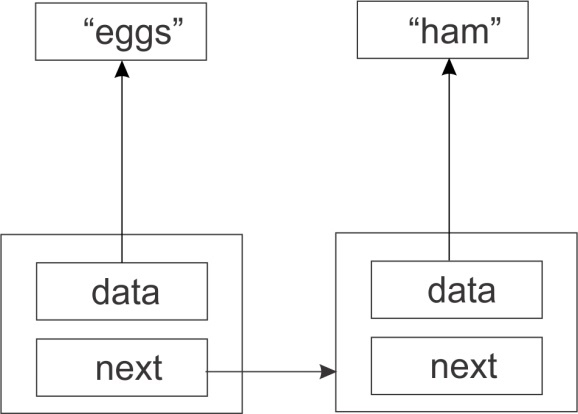

Therefore, the storage requirement for this simple node is two memory addresses. The data attribute are pointers to strings `"egg"` and `"ham"`

## Finding Endpoints
We have created 2 nodes: one containing `"eggs"`, one `"ham"` and another `"spam"`.

- `"eggs"` points to `"ham"`.
- `"ham"` points to `"spam"`.

But what does `"spam"` point to? Since this is the last element in the list, we need to make sure its `next` member has a value that makes this clear.

If we make the last element point to nothing, then this will be clear. <br>
In Python, we use the special `None` value to denote nothing.

## Node (implementation)

In [13]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        
    def __str__ (self):
        return str(data)

The `next` pointer is initialized to `None`, i.e. unless changed, the value will remain the endpoint, preventing errors in case list is not terminated properly.

Other things can be added and changed according to need. 

One thing that may be implemented is the `__str__` meathod, so it is called when passing node object to print.

## Other Node Types
Sometimes we want to go backwards as well as forewards:
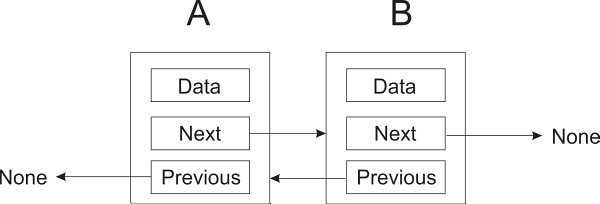<br>
So we add a `previous` pointer in addition to the `next` pointer.

In [11]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        
    def __str__ (self):
        return str(data)

`previous` is also set to `None` by default so that we can tell that we have reached a boundary.

Similarly, for creating tiles for a tiles based game:
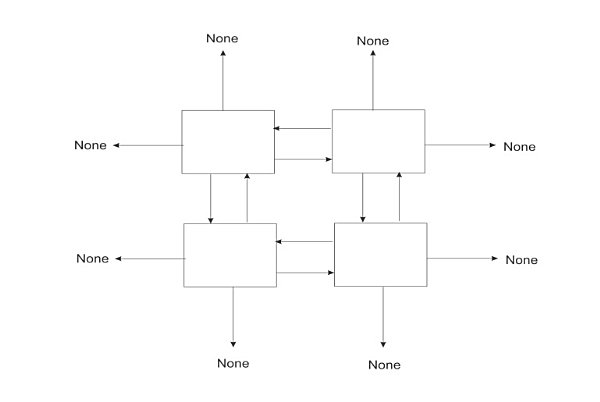

In [12]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.north = None
        self.south = None
        self.east = None        
        self.west = None
        
    def __str__ (self):
        return str(data)

## Singly Linked List
A Singly Linked List is a list with only one pointer between two successive nodes and can only be traversed in a single direction, i.e. first node to the last node. 

We use the simple `Node` class with one pointer we implemented before for this:

In [40]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        
    def __str__ (self):
        return str(self.data)

We implement a very simple linked list:

In [15]:
n1 = Node('eggs') 
n2 = Node('ham')
n3 = Node('spam')

Now we link them together to form a chain:

In [34]:
n1.next = n2
n2.next = n3

To traverse:

In [35]:
current = n1

while current:
    print(current.data)
    current = current.next

eggs
ham
spam


However, there are problems with this simplistic list implementation:
- Too much manual work by programmer.
- Error Prone (due to the former point).
- Too much inner workings exposed to programmer.

### Singly Linked List Class

Just like a list is clearly seperate from node, we start by creating a simple class to hold our linked list:

In [44]:
class SinglyLinkedList:
    
    # 1. Create a constructor that holds reference to very first node in the list:
    def __init__(self):
        self.tail = None
        
    # 2. Add append operation to append items to the list.
    def append(self, data): 
        
        # Encapsulate data in a node
        node = Node(data)
        
        if self.tail == None:
            self.tail = node
        else:
            current = self.tail
            while current.next:
                current=current.next
            current.next = node

We can append items as follows:

In [46]:
words = SinglyLinkedList()

words.append('egg')
words.append('ham')
words.append('spam')

List traversal will still work like before:

In [49]:
current = words.tail

while current:
    print(current)
    current = current.next

egg
ham
spam


### A Faster `append` Operation:
The previous `append` method traverses throught the whole list to find the insertion point, each append takes up more time than the previous call.

An $O(n)$ proves how slow the implementation is.

To improve this, we will also store the reference to the last node.

In [68]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        
    # NEW :
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node

In [60]:
words = SinglyLinkedList()

words.append('egg')
words.append('ham')
words.append('spam')

current = words.tail

while current:
    print(current)
    current = current.next

egg
ham
spam


This reduced our worst case from $O(n)$ to $O(1)$.

### Getting size of the list
One way to get size of the list is to traverse and count the nodes:

In [67]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
    # NEW :
    def size(self):
        count = 0
        current = self.tail
        while current:
            count += 1
            current = current.next
        return count

In [62]:
words = SinglyLinkedList()

words.append('egg')
words.append('ham')
words.append('spam')

words.size()

3

This works, but list traversal is an expensive operation.<br>
We can instead store the size, and increase as more nodes are appended:

In [70]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        # NEW :
        self.size = 0
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        # NEW :
        self.size += 1

In [71]:
words = SinglyLinkedList()

words.append('egg')
words.append('ham')
words.append('spam')

words.size

3

This reduced our worst case from $O(n)$ to $O(1)$.

### Improving List Traversal
List traversing is still exposed to the `Node` class.

Improving by implementing a method that returns a generator:

In [74]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        self.size += 1
        
    # NEW:
    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val

In [77]:
words = SinglyLinkedList()

words.append('egg')
words.append('ham')
words.append('spam')

for word in words.iter():
    print(word)

egg
ham
spam


### Deleting Nodes
First we need to decide how to select our node for deletion:
- By Index
- Data Node Contains

Figure of a special case considered when deleting our node from the list:
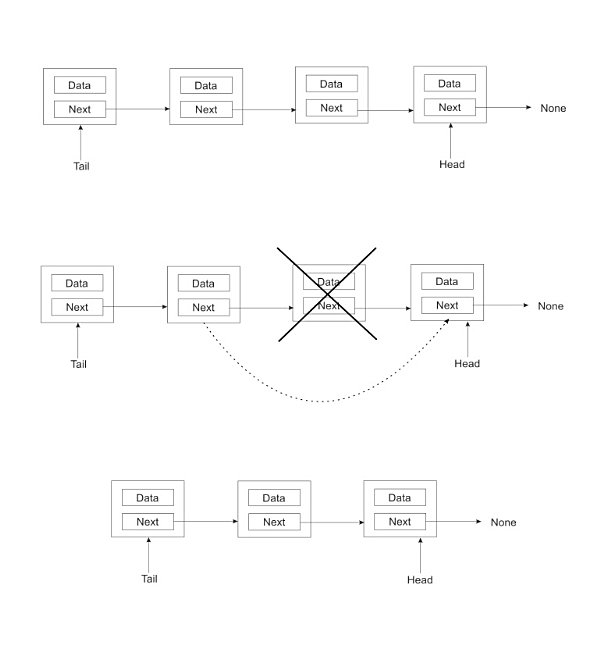

When we want to delete a node that is between two other nodes, we simply make the prevoius node point to the next node, i.e. simply cut the node to be deleted out of the chain as in the preceding image.

In [78]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        self.size += 1
        
    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val
            
    # NEW:
    def delete(self, data):
        current = current.tail
        prev = self.tail
        
        while current:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                else:
                    prev.next = current.next
                self.size -= 1
            prev = current
            current = current.next

It should take $O(n)$ to delete a node.

### List Search
We may also need a way to check whether the list contains an item.

It is fairly easy to implement thanks to the `iter()` method we previously wrote.

In [94]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        self.size += 1
        
    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val
            
    def delete(self, data):
        current = current.tail
        prev = self.tail
        
        while current:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                else:
                    prev.next = current.next
                self.size -= 1
            prev = current
            current = current.next
            
    # NEW:
    def search(self, data):
        for node in self.iter():
            if data == node:
                return True
        return False

### Clearing a List

In [83]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0
        
    def append(self, data): 
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        self.size += 1
        
    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val
            
    def delete(self, data):
        current = current.tail
        prev = self.tail
        
        while current:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                else:
                    prev.next = current.next
                self.size -= 1
            prev = current
            current = current.next
            
    def search(self, data):
        for node in self.iter():
            if data == node:
                return True
        return False
    
    # NEW:
    def clear(self):
        self.head = None
        self.tail = None

In one fell swoop, we orphan all nodes at `tail` and `head` and this has a ripple effect of orphaning all nodes in between.

## Doubly Linked List

Doubly Linked List is similar to Singly Linked List, except with two pointers, one to the next node, and other to the previous node:

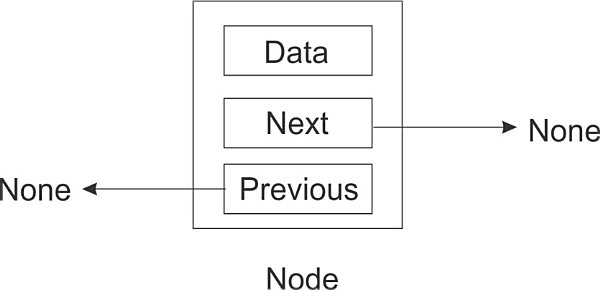
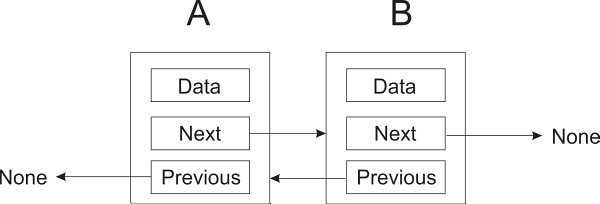

- Doubly Linked List can be traversed in any direction. 
- Depending upon the operation performed, a node within a Doubly Linked List can easily refer to its previous node without a variable to keep track of that node. 
- Deletion operations are much easier to perform. 

### A Doubly Linked List Node

In [89]:
class Node(object):
    def __init__ (self, data=None, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev

### Doubly Linked List class

In [88]:
class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        

### `append` operation
During an append operation, it is important to check if `head` is `None`, as it means that the list is empty, and should have `head` set to pointing to the just formed node. So should `tail`.

In [90]:
class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        
    # NEW:
    def append(self, data):
        """Append an item to list"""
        
        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            
        self.count +=1

Visually:

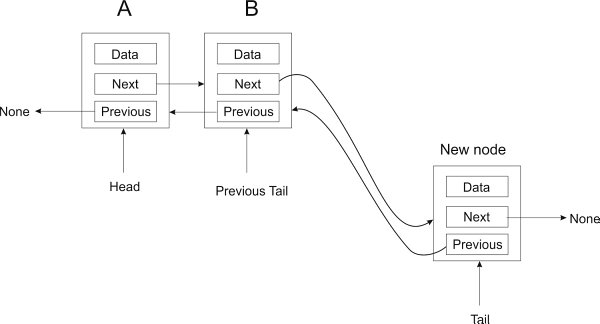

### `delete` Operation
Unlike Singly Linked List, We don't need to keep track of previous node when traversing.

The algorithm for removing nodes from DoublyLinkedList caters for 4 cases before deletion is completed:
- When the item searched is not found at all.
- When the search item is found at very beginning of the list.
- When the search item is found at the very end of list.
- When the search item is in the middle somewhere.

Node to be deleted is matched by `data` instance.

In case the node is found, `node_deleted` is set to `True`. <br>
Any other outcome results in `False`

In [91]:
class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        
    def append(self, data):
        """Append an item to list"""
        
        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            
        self.count +=1
    
    # NEW: 
    def delete(self, data):
        current = self.head
        node_deleted = False

        if current is None:
            node_deleted = False
        
        elif current.data == data:
            self.head = current.next
            self.head.prev = None
            node_deleted = True
        
        elif self.tail.data == data:
            self.tail = self.tail.prev
            self.tail.next = None
            node_deleted = True
        
        else:
            while current:
                if current.data == data:
                    current.prev.next = current.next
                    current.next.prev = current.prev
                    node_deleted = True
                current = current.next
                
        if node_deleted:
            self.count -= 1


Visually: 

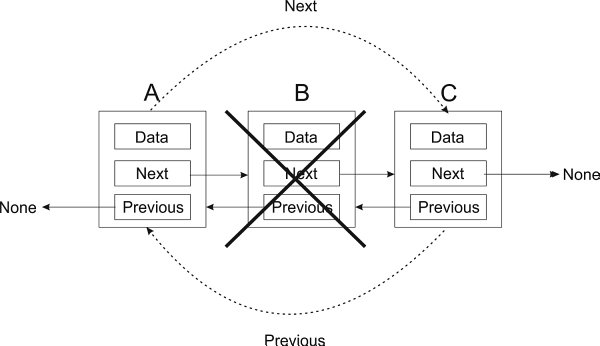
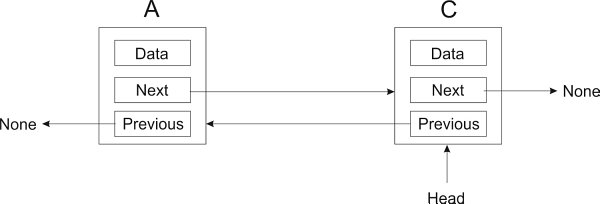

### List Search
Search algorithm is similar to that of `search` meathod in SinglyLinkedList. We call internal `iter()` meathod to return data in all nodes, and match the data passed, and return `true` in case of match, or `false` otherwise.


In [108]:
class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        
    def append(self, data):
        """Append an item to list"""
        
        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            
        self.count +=1
    
    def delete(self, data):
        current = self.head
        node_deleted = False

        if current is None:
            node_deleted = False
        
        elif current.data == data:
            self.head = current.next
            self.head.prev = None
            node_deleted = True
        
        elif self.tail.data == data:
            self.tail = self.tail.prev
            self.tail.next = None
            node_deleted = True
        
        else:
            while current:
                if current.data == data:
                    current.prev.next = current.next
                    current.next.prev = current.prev
                    node_deleted = True
                current = current.next
                
        if node_deleted:
            self.count -= 1
            
    # NEW:
    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val

    def contain(self, data):
        for node_data in self.iter():
            if data == node_data:
                return True
        return False


Our DoublyLinkedList has $O(1)$ for `append` and $O(n)$ for `delete`.



## Circular Lists
Circular Lists are special case of linked list, where endpoints are connected, i.e. last node points back to first node in case of SinglyLinkedList based and also vice versa in case of DoublyLinkedList based.

Here, we are going to look at the implementation of SinglyLinkedList.

We can reuse the `Node` class from SinglyLinkedList.

In [93]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        
    def __str__ (self):
        return str(data)

In [96]:
class CircularList(object):
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0

### `append` Operation

In [99]:
class CircularList(object):
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0
        
    # NEW:
    def append(self):
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.head = node
            self.tail = node
        self.head.next = self.tail
        self.size += 1

### `delete` Operation

In [102]:
class CircularList(object):
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0

    def append(self):
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.head = node
            self.tail = node
        self.head.next = self.tail
        self.size += 1
            
    # NEW:
    def delete(self, data):
        current = self.tail
        prev = self.tail
        while prev == current or prev != self.head:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                    self.head.next = self.tail
                else:
                    prev.next = current.next
                self.size -=1
                return
            prev = current
            current = current.next

### `iter()` Operation

In [106]:
class CircularList(object):
    
    def __init__(self):
        self.tail = None
        self.head = None
        self.size = 0

    def append(self):
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.head = node
            self.tail = node
        self.head.next = self.tail
        self.size += 1
    
    def delete(self, data):
        current = self.tail
        prev = self.tail
        while prev == current or prev != self.head:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                    self.head.next = self.tail
                else:
                    prev.next = current.next
                self.size -=1
                return
            prev = current
            current = current.next
                    
    # NEW:
    def iter():
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val

## Summary
In this chapter, we looked at:
- Linked Lists, studied its concepts, such as Nodes and Pointers to other nodes.
- Implemented Major Operations that occur on these lists. 
- Saw worst case runtimes.